In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics 
from statistics import mode 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


In [26]:
data = pd.read_csv("mushrooms.csv")

In [27]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [28]:
data['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [29]:
data.drop(['veil-type'],axis=1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [30]:
Class = data['class']
Attributes = data.drop(['class'],axis = 1)

In [31]:
Class.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [32]:
Attributes.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [33]:
most_fre = mode(Attributes['stalk-root'])
for i in range(0, len(Attributes['stalk-root']),1):
    if Attributes['stalk-root'][i] == "?":
        Attributes['stalk-root'][i] = most_fre

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in Attributes.columns:
    Attributes[i]=le.fit_transform(Attributes[i])

In [35]:
kmeanClsutering = KMeans(n_clusters = 2)
kmeanClsutering.fit(Attributes)

KMeans(n_clusters=2)

In [36]:
result = kmeanClsutering.predict(Attributes)

In [37]:
contrast = pd.DataFrame()
contrast['prediction'] = result 
contrast['reality'] = Class
contrast.head()

,prediction,reality
0,0,p
1,0,e
2,0,e
3,0,p
4,0,e


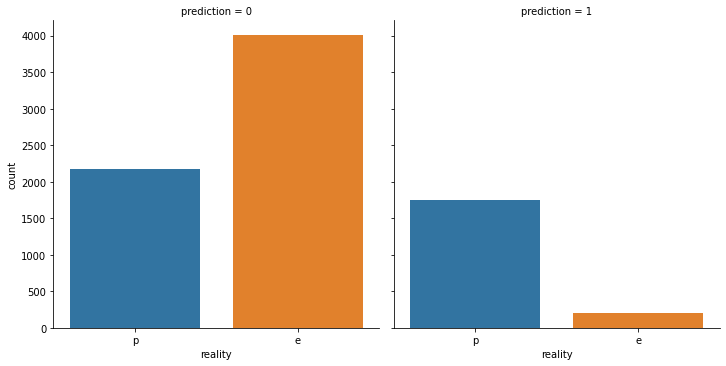

In [38]:

sns.factorplot(col='prediction', x='reality', data=contrast, kind='count')